In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import matplotlib.colors as colors

In [11]:
# Importing txt file I'll make plots with

#names = ['ra', 'dec', 'umag', 'gmag', 'rmag', 'imag', 'z_b', 'flag', 'z_b_ugri'])

cmass = '/Users/erinorlovsky/OneDrive - The Ohio State University/Research/DMASS/Catalogs/galaxy_DR12v5_CMASS_North.fits.gz'
cat2 = '/Users/erinorlovsky/OneDrive - The Ohio State University/Research/DMASS/Catalogs/KiDS/KV450_G9_reweight_3x4x4_v2_good.cat'
cat3 = '/Users/erinorlovsky/OneDrive - The Ohio State University/Research/DMASS/Skyserver_SQL6_25_2020 8_58_19 PM.fits'

hdu1 = fits.open(cmass)
ra1 = hdu1[1].data['RA']
dec1 = hdu1[1].data['DEC']

hdu2 = fits.open(cat2)
ra2 = hdu2[1].data['ALPHA_J2000']
dec2 = hdu2[1].data['DELTA_J2000']

hdu3 = fits.open(cat3)
ra3 = hdu3[1].data['ra']
dec3 = hdu3[1].data['dec']

ra2min, ra2max = ra2.min(), ra2.max()

umag = hdu2[1].data['MAG_GAAP_u_CALIB']
gmag = hdu2[1].data['MAG_GAAP_g_CALIB']
rmag = hdu2[1].data['MAG_GAAP_r_CALIB']
imag = hdu2[1].data['MAG_GAAP_i_CALIB']

u_modelmag = hdu3[1].data['modelMag_u']
g_modelmag = hdu3[1].data['modelMag_u']
r_modelmag = hdu3[1].data['modelMag_u']
i_modelmag = hdu3[1].data['modelMag_u']

good = (ra1 > ra2min) & (ra1 < ra2max)

good_ra1 = ra1[good]
good_dec1 = dec1[good]

In [15]:
from astropy import units as u
from astropy.coordinates import SkyCoord

c = SkyCoord(ra = good_ra1*u.degree, dec = good_dec1*u.degree)
c2 = SkyCoord(ra = ra2*u.degree, dec = dec2*u.degree)
c3 = SkyCoord(ra = ra3*u.degree, dec = dec3*u.degree)

idx1, d2d1, d3d1 = c.match_to_catalog_sky(c2)

idx2, d2d2, d3d2 = c2.match_to_catalog_sky(c3)

Text(0.5, 1.0, 'Hist')

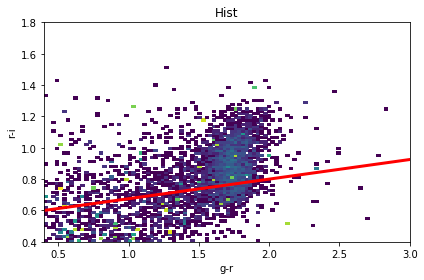

In [31]:
fig1, ax1 = plt.subplots(tight_layout=True)
hist1 = ax1.hist2d(gmag[idx1] - rmag[idx1], rmag[idx1] - imag[idx1], bins = 100, range = [[0.4,3],[0.4,1.8]], norm = colors.LogNorm())

d = (rmag[idx2] - imag[idx2]) - ((gmag[idx2] - rmag[idx2]) / 8.)

ax1.plot(array, 0.55 + (array / 8.),'r', linewidth = 3)

ax1.set_xlabel('g-r')
ax1.set_ylabel('r-i')
ax1.set_title('Hist')

In [26]:
array = np.arange(-3, 3.1, 0.1)